## Multiclass Classification
Multiclass classification includes more than two classes to classify into. 
Mathematically, this means that each output prediction will be a vector. If we assign our unique target values into a number sequence, starting from 0, we can assign each target to a specific index placement in the vector. In this way, we will know from the prediction value's index number, which target it corresponds to. 

For example if the highest probability is in the 3rd index placement of the vector ([ .46, .39, .73, .98, .24, .07 ]), then that object is classified into class 3. 

So, in this notebook we'll modify the logistic regression model to perform multiclass classification.

First we need to reassign the unique class values to a proper number sequence.

In [67]:
import numpy as np
import pandas as pd
from numpy import matlib as mb

In [70]:
#load data
training = pd.read_csv("data/training_set.csv")
meta = pd.read_csv('data/training_set_metadata.csv', delimiter=",")
Y = pd.read_csv('data/Y.csv')
X = pd.read_csv('data/X.csv')
X_feat = pd.read_csv('data/X_feat.csv',index_col = 0)
X_train = pd.read_csv('data/X_train.csv', index_col = 0)
X_test = pd.read_csv('data/X_test.csv', index_col = 0)

In [74]:
#Put unique classes from meta dataframe into a list
classes = list(meta['target'].unique())

#Assign a number to each unique class from 0-13 (there are 14 unique classes and 0 counts)
assign = {classes[i]: i for i in range(len(classes))}

#Replace target values with their assigned class numbers 
target = list(meta['target'])
assign_target = []

for i in range(len(target)): 
    assign_target += [assign[target[i]]]
    
#Dataframe for target values only, named Ym(Ym for Y multiclass version)
Ym_columns = ['class']
Ym = pd.DataFrame(columns=Ym_columns)
Ym['class'] = assign_target
#save Ym as csv
Ym.to_csv('Ym.csv', index=False)

Ym.head(5)

,class
0,0
1,1
2,2
3,3
4,3


In [6]:
#Split training set into a training and test set, 70-30 split
from sklearn.model_selection import train_test_split

X_train, X_test, ym_train, ym_test = train_test_split(X_feat, Ym, test_size=0.3, random_state=0)

*This part below may make more sense after you run the logistic regression model, see the accuracy, and run the confusion matrix
The confusion matrix allows us to see how our model is performing. One thing we should look at is the distribution of the predictions for each class. If one class is being predicted a lot, when it is not truly that class, then we could manually adjust the weight for that class. By adjusting the weight value, we are giving that class a specific weight of importance. For example, a larger value means we want to focus more on predicting that class and a lower value would mean we want to focus less on that class. 

So, in this case for example, class 3 is predicted A LOT, so we should assign it to a smaller weight value, while class 8 is barely predicted, so we should assign it a larger weight value. 

In [7]:
#Fiddle with weight values to establish which classes are more/less important to target for the logistic regression
#model
w1 = {i: 1.0 for i in range(6)}
w2 = {i: 1.0 for i in range(7, 14)}
weights = {**w1, **w2}
weights[3] = 0.8
weights[8] = 2.0
weights[10] = 2.0
weights[7] = 2.0
weights[2] = 1.25

In [8]:
#Construct logistic regression model and train it with training sets
#make multi_class = 'multinomial', for multiclass classification

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=5000, class_weight=weights)
logreg.fit(X_train, ym_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0,
                   class_weight={0: 1.0, 1: 1.0, 2: 1.25, 3: 0.8, 4: 1.0,
                                 5: 1.0, 7: 2.0, 8: 2.0, 9: 1.0, 10: 2.0,
                                 11: 1.0, 12: 1.0, 13: 1.0},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=5000, multi_class='multinomial',
                   n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
                   tol=0.0001, verbose=0, warm_start=False)

In [9]:
#Evaluate model with test sets and obtain prediction accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, ym_test)))

Accuracy of logistic regression classifier on test set: 0.55


(14.0, 0.0)

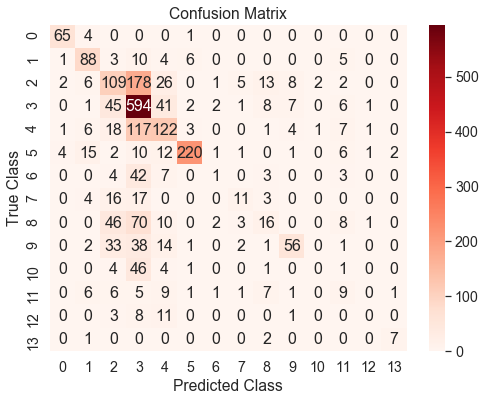

In [61]:
#import necessary libraries for confusion matrix creation
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()
cm = sklearn.metrics.confusion_matrix(ym_test, y_pred) #Create a confusion matrix 

sns.set(font_scale=1.3) #font
f, ax = plt.subplots(figsize=(8, 6)) #figure size
sns.heatmap(cm, annot=True, fmt="d", linewidths=0, ax=ax, cmap='Reds', annot_kws={"size": 16})

#Set labels
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.set_ylim(len(classes)-.0,.0)

In [62]:
#Extract the top 5 class predictions for each object 
probs = logreg.predict_proba(X_test)

best_5 = np.argsort(probs, axis=1)[:,-5:].tolist()
for i in range(len(best_5)):
    best_5[i].reverse()
t5_array = np.array(best_5)

In [19]:
#Calculate overall fraction of the time the predicted class is in the top 1-5 predicted classes
frac_1 = sum(t5_array[:, 0] == ytest_array)/len(ytest_array) #determine the fraction
ytest_array = np.array(ym_test)[:, 0]

frac_correct = sum(t5_array[:, 0] == ytest_array)/len(ytest_array)
print('frac in top ' + str(1) + ': ' + str(frac_correct))
frac = []

#determine fraction for top 5
frac.append(frac_1)
for i in range(2, 6):
    true_class = mb.repmat(ytest_array, i, 1).T
    frac_correct = np.sum(t5_array[:, :i] == true_class)/len(ytest_array)
    print('frac in top ' + str(i) + ': ' + str(frac_correct))
    frac.append(frac_correct)

frac in top 1: 0.5511677282377919
frac in top 2: 0.7201698513800424
frac in top 3: 0.8148619957537155
frac in top 4: 0.8832271762208068
frac in top 5: 0.9176220806794055
